# Lab 1
`By Yurii Voievidka`

## Task 1

In [1]:
import pandas as pd

In [2]:
train_raw = pd.read_csv('hourly_wages_data.csv')
X = train_raw.drop(columns=['wage_per_hour'])
y = train_raw['wage_per_hour']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=1) ## 0.33 * 0.3 = 0.1 for test


In [4]:
## Scaling and Normalization
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
X_train.head()

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
106,1,14,21,41,0,1,0,0,0
189,0,18,14,38,1,1,0,0,0
504,0,17,10,33,1,0,0,0,0
477,0,18,27,51,0,1,0,0,0
350,0,2,16,24,0,0,0,0,0


In [6]:
## Scaling

# scaled_X = minmax_scaling(y_train, columns=['wage_per_hour'])
# ax = sns.histplot(scaled_X, kde=True)
# ax.set_title('Scaled wages')
# ax.show()


In [123]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)

n_cols = X_train.shape[1]

model = Sequential([
    Dense(200, activation='relu', input_shape=(n_cols, )),
    Dense(200, activation='relu'),
    Dense(200, activation='relu'),
    Dense(1)
])

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
model.fit(X_train, 
          y_train, 
          validation_split=0.0, 
          validation_data=(X_val, y_val),
          epochs=30, 
          callbacks=[early_stopping_monitor])

Epoch 1/30
12/12 [==============================] - 0s 13ms/step - loss: 21.6080 - val_loss: 19.2003
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 21.5111 - val_loss: 20.4737
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 21.1396 - val_loss: 19.3001
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 21.4496 - val_loss: 19.8250


In [18]:
model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


array([[ 6.9910913],
       [12.716263 ],
       [10.281483 ],
       [ 3.8815782],
       [ 7.1920066],
       [10.026417 ],
       [ 5.3114405],
       [10.287465 ],
       [12.173947 ],
       [ 8.01795  ],
       [ 9.36623  ],
       [13.545427 ],
       [ 7.5752707],
       [ 7.676775 ],
       [ 4.7771416],
       [ 5.7619276],
       [ 4.2122693],
       [ 7.896549 ],
       [ 5.254123 ],
       [12.006744 ],
       [ 7.807425 ],
       [ 9.721127 ],
       [ 5.869656 ],
       [11.624999 ],
       [ 6.2168145],
       [ 5.604036 ],
       [ 6.619551 ],
       [11.391342 ],
       [ 9.313694 ],
       [ 9.102544 ],
       [ 9.067106 ],
       [11.137327 ],
       [ 6.7951202],
       [ 9.001675 ],
       [ 9.695916 ],
       [14.48348  ],
       [10.258003 ],
       [ 7.1617284],
       [ 5.4300423],
       [ 7.092858 ],
       [ 7.6029286],
       [ 7.572657 ],
       [ 3.9487574],
       [ 6.2529187],
       [ 9.140731 ],
       [ 7.086826 ],
       [ 6.2863507],
       [ 4.98

## Task 2

In [35]:
from keras.utils import to_categorical

In [74]:
train_raw = pd.read_csv('./hourly_wages_data.csv')
X = train_raw.drop(columns=['manufacturing'])
y = train_raw['manufacturing']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=1) ## 0.33 * 0.3 = 0.1 for test

print(y_train[:5])

106    0
189    0
504    0
477    0
350    0
Name: manufacturing, dtype: int64


In [93]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)
y_test_categorical = to_categorical(y_test)
print(y_train_2[:5])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [94]:
model_2 = Sequential()

In [95]:
n_cols_2 = X_train.shape[1]

In [96]:
model_2.add(Dense(200, activation='relu', input_shape=(n_cols_2,)))
model_2.add(Dense(200, activation='relu'))
model_2.add(Dense(200, activation='relu'))
model_2.add(Dense(2, activation='softmax'))


In [115]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [116]:
model_2.fit(X_train, y_train_categorical, epochs=30, validation_split=0.0, validation_data=(X_val, y_val_categorical), callbacks=[early_stopping_monitor])

Epoch 1/30
12/12 [==============================] - 1s 11ms/step - loss: 0.4997 - accuracy: 0.8123 - val_loss: 0.5120 - val_accuracy: 0.8333
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.7989 - val_loss: 0.5139 - val_accuracy: 0.7963
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.5121 - accuracy: 0.8070 - val_loss: 0.5290 - val_accuracy: 0.7963
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.8070 - val_loss: 0.5516 - val_accuracy: 0.7407


In [117]:
predictions = model_2.predict(X_test)
print(predictions[:5])

4/4 [==============================] - 0s 1ms/step
[[0.9159497  0.08405026]
 [0.6751858  0.32481423]
 [0.56436926 0.43563074]
 [0.96184653 0.03815345]
 [0.60346156 0.39653847]]


In [118]:
model_2.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [119]:
model_2.fit(X_train, y_train_categorical, epochs=30, validation_split=0.0, validation_data=(X_val, y_val_categorical), callbacks=[early_stopping_monitor])

Epoch 1/30
12/12 [==============================] - 0s 11ms/step - loss: 0.5187 - accuracy: 0.7668 - val_loss: 0.5476 - val_accuracy: 0.7407
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.7694 - val_loss: 0.5441 - val_accuracy: 0.7407
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.7748 - val_loss: 0.5404 - val_accuracy: 0.7407
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7802 - val_loss: 0.5371 - val_accuracy: 0.7407
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7775 - val_loss: 0.5340 - val_accuracy: 0.7407
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.7855 - val_loss: 0.5310 - val_accuracy: 0.7593
Epoch 7/30
12/12 [==============================] - 0s 3ms/step - loss: 0.4996 - accuracy: 0.7828 - val_loss: 0.5281 - val_accuracy: 0.7593
Epoch 8/30
12/12 [=

In [120]:
predictions = model_2.predict(X_test)
print(predictions[:5])

4/4 [==============================] - 0s 1ms/step
[[0.9448819  0.05511807]
 [0.8178056  0.18219446]
 [0.64927495 0.35072497]
 [0.97308457 0.02691546]
 [0.74513066 0.25486934]]


In [121]:
# Comparing Adam and Adadelta we see that adadelta predicts more accurate due to stepsize

ValueError: x has 9 columns but y has 2 columns

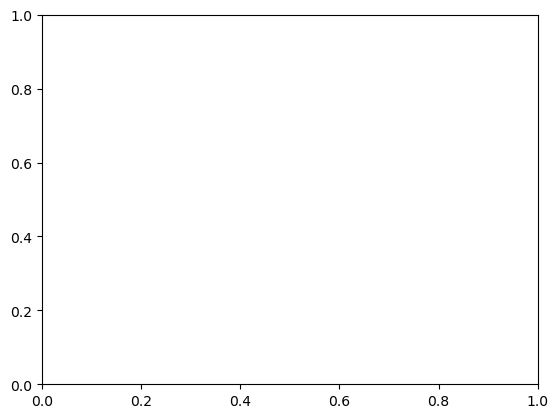

In [122]:
plt.figure(dpi=100)
plt.plot(X_test, predictions, 'k')
